In [1]:
import pickle
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats import multiscale_graphcorr
from hyppo.independence import Dcorr
import numpy as np
%matplotlib inline

In [87]:
with open('./restricted_perm_centering/dcorr_4_centering_tests.pkl', 'rb') as f:
    dcorr_results = pickle.load(f)

In [88]:
dcorr_results.keys()

dict_keys([('Restricted, group centering', 'similar', 'within'), ('Restricted, group centering', 'similar', 'across'), ('Restricted, group centering', 'distant', 'within'), ('Restricted, group centering', 'distant', 'across'), ('Restricted, group mask', 'similar', 'within'), ('Restricted, group mask', 'similar', 'across'), ('Restricted, group mask', 'distant', 'within'), ('Restricted, group mask', 'distant', 'across'), ('Restricted', 'similar', 'within'), ('Restricted', 'similar', 'across'), ('Restricted', 'distant', 'within'), ('Restricted', 'distant', 'across'), ('Unrestricted', 'similar', 'within'), ('Unrestricted', 'similar', 'across'), ('Unrestricted', 'distant', 'within'), ('Unrestricted', 'distant', 'across')])

In [12]:
cols = ['Unrestricted', 'Restricted', 'Restricted, group mask', 'Restricted, group centering']
rows = [
    'similar, within',
    'similar, across',
    'distant, within',
    'distant, across',
]

In [89]:
plot_dict = defaultdict(dict)
for (test, group, label), val in dcorr_results.items():
    plot_dict[test][group + ', ' + label] = val

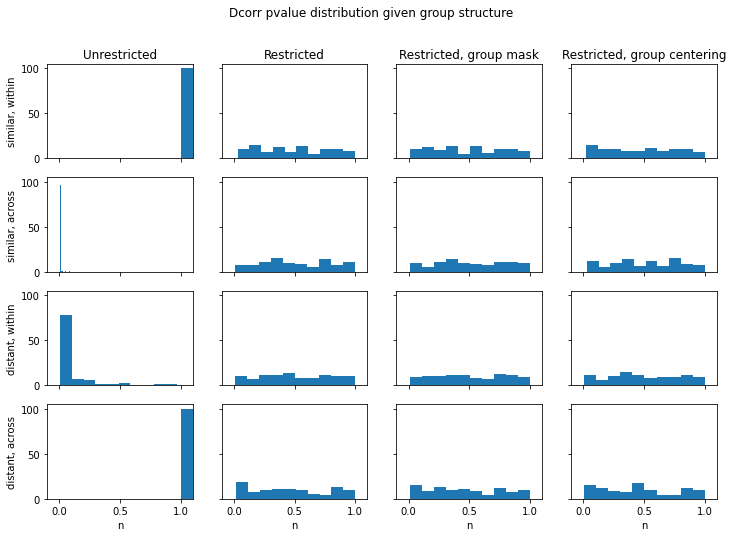

In [91]:
fig, axes = plt.subplots(len(rows), len(cols), figsize=(12,8), sharex=True, sharey=True)

for r in range(len(rows)):
    for c in range(len(cols)):
        axes[r, c].hist(plot_dict[cols[c]][rows[r]])
        if r == 0:
            axes[r, c].set_title(cols[c])
        if c == 0:
            axes[r, c].set_ylabel(rows[r])
        if r == len(rows) - 1:
            axes[r, c].set_xlabel('n')
        axes[r, c].set_xlim(-0.1,1.1)
plt.suptitle('Dcorr pvalue distribution given group structure')
plt.show()

In [14]:
with open('./restricted_perm_centering/MGC_4_centering_tests.pkl', 'rb') as f:
    mgc_results = pickle.load(f)

In [15]:
mgc_plot_dict = defaultdict(dict)
for (test, group, label), val in mgc_results.items():
    mgc_plot_dict[test][group + ', ' + label] = val

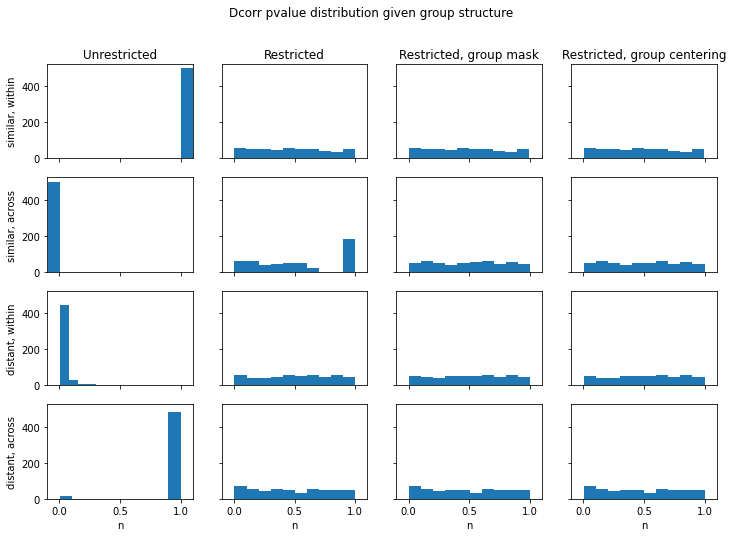

In [16]:
fig, axes = plt.subplots(len(rows), len(cols), figsize=(12,8), sharex=True, sharey=True)

for r in range(len(rows)):
    for c in range(len(cols)):
        axes[r, c].hist(mgc_plot_dict[cols[c]][rows[r]])
        if r == 0:
            axes[r, c].set_title(cols[c])
        if c == 0:
            axes[r, c].set_ylabel(rows[r])
        if r == len(rows) - 1:
            axes[r, c].set_xlabel('n')
        axes[r, c].set_xlim(-0.1,1.1)
plt.suptitle('MGC pvalue distribution given group structure')
plt.show()